In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv("../atp_transformed/2000-2024 players_2.csv")

df.head(10)

C:\Users\jesse\AppData\Local\Temp\ipykernel_6020\1216744751.py:8: DtypeWarning: Columns (15,16,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../atp_transformed/2000-2024 players_2.csv")


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,tourney_round,...,median_diff_rolling_mean_10,total_diff_rolling_mean_10,mean_tb_numb_rolling_mean_10,median_tb_numb_rolling_mean_10,total_tb_numb_rolling_mean_10,mean_tb_diff_rolling_mean_10,median_tb_diff_rolling_mean_10,total_tb_diff_rolling_mean_10,elo_next_match,player_hand_missing
0,1975-237,Sao Paulo WCT,Carpet,32.0,A,1975-03-10,2,6-1 6-1,3,R32,...,3.200000,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
1,1975-2023,Fairfield,Carpet,32.0,A,1975-02-24,13,6-0 6-0,3,R32,...,4.700000,8.500000,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0
2,1975-436,Charlotte,Clay,32.0,A,1975-04-21,7,6-4 3-6 6-4,3,R32,...,3.416667,5.857143,0.0,0.0,0.0,0.0,0.0,0.0,1571.881887,0
3,1974-2030,Merion,Grass,64.0,A,1974-08-25,247,6-2 6-2,3,R64,...,2.428571,5.428571,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
4,1977-345,Monterrey WCT,Carpet,16.0,A,1977-02-28,4,6-0 6-1,3,R16,...,3.611111,7.200000,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0
5,1973-653,Fort Worth,Hard,32.0,A,1973-10-07,276,6-4 6-1,3,R32,...,1.428571,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
6,1973-498,Osaka,Hard,32.0,A,1973-10-07,6,6-4 4-6 6-2,3,R32,...,6.000000,12.000000,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0
7,1973-9204,Kingston,Hard,16.0,A,1973-12-12,290,6-2 7-5,3,R16,...,3.300000,7.100000,0.0,0.0,0.0,0.0,0.0,0.0,1686.417222,0
8,1975-707,South Orange,Clay,32.0,A,1975-08-18,276,6-4 6-0,3,R32,...,3.350000,6.900000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
9,1977-7308,Adelaide,Grass,64.0,A,1977-01-10,277,6-4 6-2,3,R32,...,3.100000,6.900000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0


In [3]:
# Check for missing values
df.isnull().sum()

tourney_id                            0
tourney_name                          0
surface                               0
draw_size                             0
tourney_level                         0
                                  ...  
mean_tb_diff_rolling_mean_10      69958
median_tb_diff_rolling_mean_10    69958
total_tb_diff_rolling_mean_10      1490
elo_next_match                     7522
player_hand_missing                   0
Length: 132, dtype: int64

## Define classes Target: Top10/NotTop10

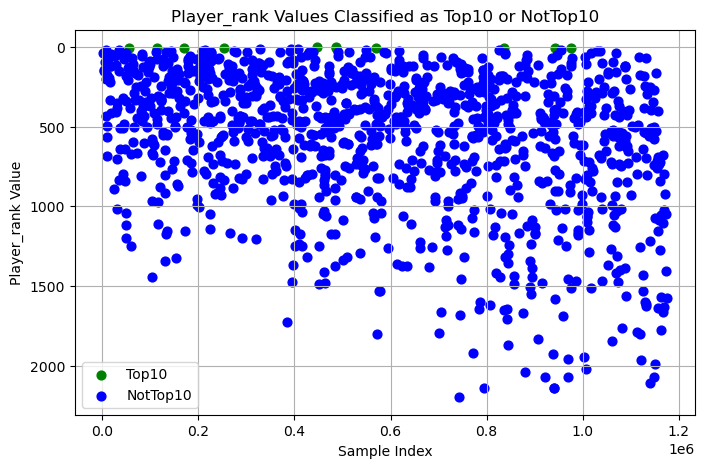

In [18]:
# Small sample
df_sample = df.sample(frac=0.001, random_state=42)

# Correct: use df_sample for the target
df_sample['target'] = df_sample['player_rank'].apply(
    lambda x: 'Top10' if x <= 10 else 'NotTop10'
)

# Plot
plt.figure(figsize=(8, 5))

# Scatter plot (index on x-axis, player_rank on y-axis)
for label, color in [('Top10', 'Green'), ('NotTop10', 'Blue')]:
    subset = df_sample[df_sample['target'] == label]
    plt.scatter(subset.index, subset['player_rank'], 
                color=color, label=label, s=40)

# Flip y-axis
plt.gca().invert_yaxis()

plt.title("Player_rank Values Classified as Top10 or NotTop10")
plt.xlabel("Sample Index")
plt.ylabel("Player_rank Value")
plt.legend()
plt.grid(True)
plt.show()


Sample size: 994


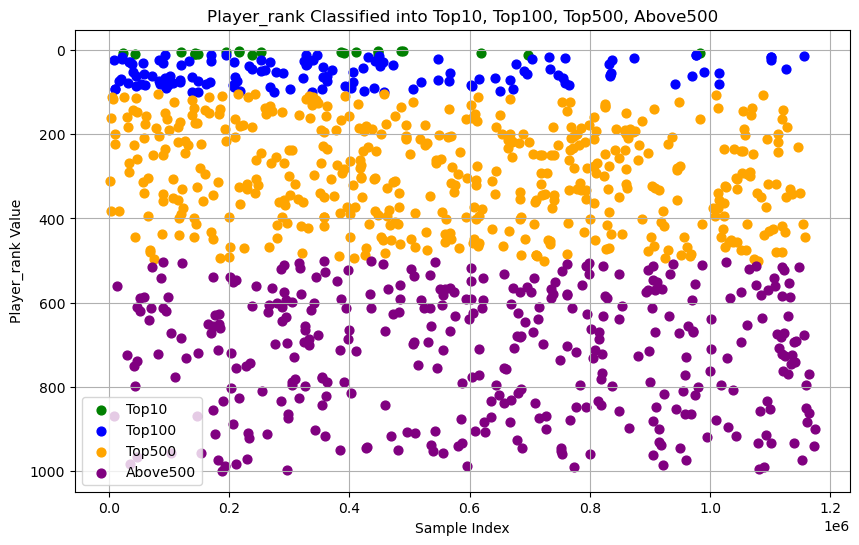

In [26]:
# Small sample
df_sample = df[df['player_rank'] <= 1000]
df_sample = df_sample.sample(frac=0.001, random_state=42) # 0.001 = 0.1% of the data
print("Sample size:", len(df_sample))

# New target categories
def classify_rank(x):
    if x <= 10:
        return 'Top10'
    elif x <= 100:
        return 'Top100'
    elif x <= 500:
        return 'Top500'
    else:
        return 'Above500'

df_sample['target'] = df_sample['player_rank'].apply(classify_rank)

# Plot
plt.figure(figsize=(10, 6))

colors = {
    'Top10': 'green',
    'Top100': 'blue',
    'Top500': 'orange',
    'Above500': 'purple'
}

# Scatter plot
for label, color in colors.items():
    subset = df_sample[df_sample['target'] == label]
    plt.scatter(subset.index, subset['player_rank'], 
                color=color, label=label, s=40)

# Flip y-axis
plt.gca().invert_yaxis()

plt.title("Player_rank Classified into Top10, Top100, Top500, Above500")
plt.xlabel("Sample Index")
plt.ylabel("Player_rank Value")
plt.legend()
plt.grid(True)
plt.show()


## KNN = 4: With normalization, Top10, Top100, Top500, Above500

In [35]:
# --- FEATURES & LABEL ---
X = df_sample[["player_age"]]   # features to be normalized
y = df_sample["target"]         # used as target value

# --- TRAIN / TEST SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- NORMALIZATION ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- KNN CLASSIFIER ---
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# --- PREDICTION ---
y_pred = knn.predict(X_test_scaled)

# --- EVALUATION ---
accuracy_1_2 = accuracy_score(y_test, y_pred)
precision_1_2 = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_1_2 = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1_1_2 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print("Accuracy:", round(accuracy_1_2, 2))
print("Precision:", round(precision_1_2, 2))
print("Recall:", round(recall_1_2, 2))
print("F1 Score:", round(f1_1_2, 2))

Accuracy: 0.43
Precision: 0.29
Recall: 0.29
F1 Score: 0.28


### 2. Define classes Target: Low/Medium/High

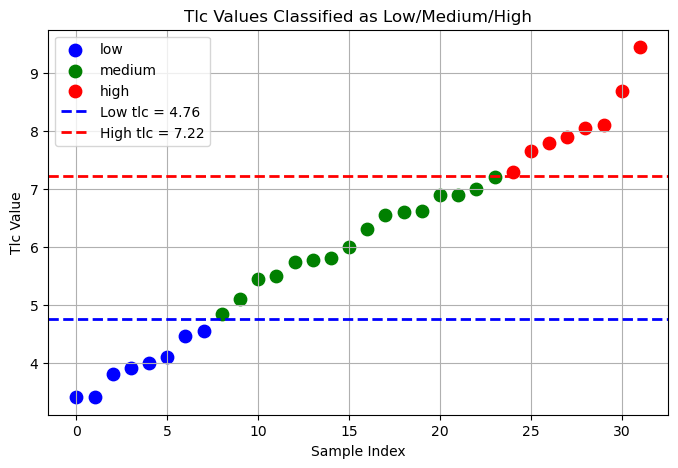

In [130]:
# Quartiles
q1 = df['tlc'].quantile(0.25)
q3 = df['tlc'].quantile(0.75)

# 3-class target
def classify_tlc(x):
    if x < q1:
        return "low"
    elif x > q3:
        return "high"
    else:
        return "medium"

df['target'] = df['tlc'].apply(classify_tlc)

# Plot
plt.figure(figsize=(8, 5))

# Scatter plot (index on x-axis, TLC on y-axis)
for label, color in [('low', 'blue'), ('medium', 'green'), ('high', 'red')]:
    subset = df[df['target'] == label]
    plt.scatter(subset.index, subset['tlc'], 
                color=color, label=label, s=80)

# Add low/high line
plt.axhline(q1, color='blue', linestyle='--', linewidth=2,
            label=f"Low tlc = {q1:.2f}")
plt.axhline(q3, color='red', linestyle='--', linewidth=2,
            label=f"High tlc = {q3:.2f}")

plt.title("Tlc Values Classified as Low/Medium/High")
plt.xlabel("Sample Index")
plt.ylabel("Tlc Value")
plt.legend()
plt.grid(True)
plt.show()

## 2.1 KNN = 4: With normalization, low/medium/high classification target value

In [131]:
# --- FEATURES & LABEL ---
X = df[["age", "sex", "height"]]   # features to be normalized
y = df["target"]                   # used as target value

# --- TRAIN / TEST SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- NORMALIZATION ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- KNN CLASSIFIER ---
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_scaled, y_train)

# --- PREDICTION ---
y_pred = knn.predict(X_test_scaled)

# --- EVALUATION ---
accuracy_2_1 = accuracy_score(y_test, y_pred)
precision_2_1 = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_2_1 = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1_2_1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print("Accuracy:", round(accuracy_2_1, 2))
print("Precision:", round(precision_2_1, 2))
print("Recall:", round(recall_2_1, 2))
print("F1 Score:", round(f1_2_1, 2))


Accuracy: 0.57
Precision: 0.44
Recall: 0.39
F1 Score: 0.41


## 2.2 KNN = 5: With normalization, low/medium/high classification target value

In [132]:
# --- FEATURES & LABEL ---
X = df[["age", "sex", "height"]]   # features to be normalized
y = df["target"]                   # used as target value

# --- TRAIN / TEST SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- NORMALIZATION ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- KNN CLASSIFIER ---
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# --- PREDICTION ---
y_pred = knn.predict(X_test_scaled)

# --- EVALUATION ---
accuracy_2_2 = accuracy_score(y_test, y_pred)
precision_2_2 = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_2_2 = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1_2_2 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print("Accuracy:", round(accuracy_2_2, 2))
print("Precision:", round(precision_2_2, 2))
print("Recall:", round(recall_2_2, 2))
print("F1 Score:", round(f1_2_2, 2))

Accuracy: 0.71
Precision: 0.71
Recall: 0.71
F1 Score: 0.71


### 3. Define classes Target: Very Low/Low/Medium/High/Very High

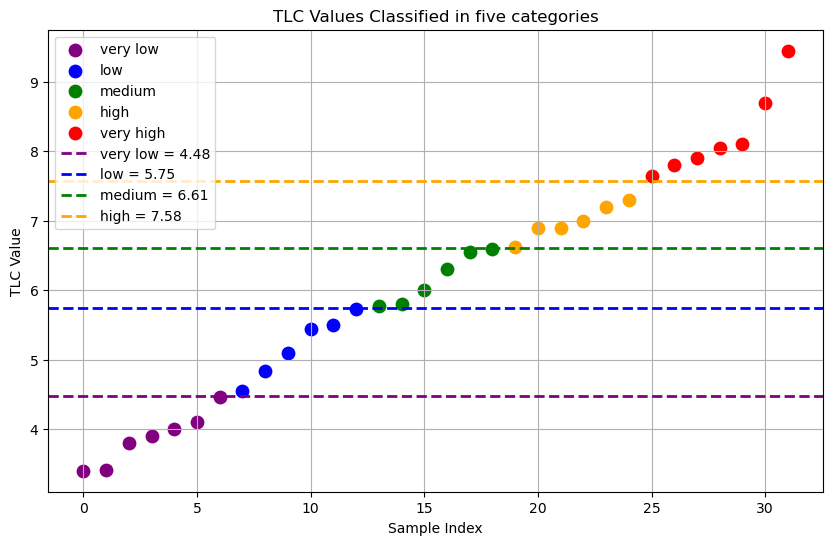

In [133]:
# Quintiles
q20 = df['tlc'].quantile(0.20)
q40 = df['tlc'].quantile(0.40)
q60 = df['tlc'].quantile(0.60)
q80 = df['tlc'].quantile(0.80)

# 5-class target
def classify_tlc(x):
    if x < q20:
        return "very low"
    elif x < q40:
        return "low"
    elif x < q60:
        return "medium"
    elif x < q80:
        return "high"
    else:
        return "very high"

df['target'] = df['tlc'].apply(classify_tlc)

plt.figure(figsize=(10, 6))

colors = {
    "very low": "purple",
    "low": "blue",
    "medium": "green",
    "high": "orange",
    "very high": "red"
}

for label in ["very low", "low", "medium", "high", "very high"]:
    subset = df[df['target'] == label]
    plt.scatter(
        subset.index,
        subset['tlc'],
        color=colors[label],
        label=label,
        s=80
    )

# Add quintile lines
plt.axhline(q20, color='purple', linestyle='--', linewidth=2, label=f"very low = {q20:.2f}")
plt.axhline(q40, color='blue', linestyle='--', linewidth=2, label=f"low = {q40:.2f}")
plt.axhline(q60, color='green', linestyle='--', linewidth=2, label=f"medium = {q60:.2f}")
plt.axhline(q80, color='orange', linestyle='--', linewidth=2, label=f"high = {q80:.2f}")

plt.title("TLC Values Classified in five categories")
plt.xlabel("Sample Index")
plt.ylabel("TLC Value")
plt.legend()
plt.grid(True)
plt.show()

## 3.1 KNN = 4: With normalization, five classes classification target value

In [134]:
# --- FEATURES & LABEL ---
X = df[["age", "sex", "height"]]   # features to be normalized
y = df["target"]                   # used as target value

# --- TRAIN / TEST SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- NORMALIZATION ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- KNN CLASSIFIER ---
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_scaled, y_train)

# --- PREDICTION ---
y_pred = knn.predict(X_test_scaled)

# --- EVALUATION ---
accuracy_3_1 = accuracy_score(y_test, y_pred)
precision_3_1 = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_3_1 = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1_3_1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print("Accuracy:", round(accuracy_3_1, 2))
print("Precision:", round(precision_3_1, 2))
print("Recall:", round(recall_3_1, 2))
print("F1 Score:", round(f1_3_1, 2))

Accuracy: 0.71
Precision: 0.58
Recall: 0.75
F1 Score: 0.65


## 3.2 KNN = 2: With normalization, five classes classification target value

In [135]:
# --- FEATURES & LABEL ---
X = df[["age", "sex", "height"]]   # features to be normalized
y = df["target"]                   # used as target value

# --- TRAIN / TEST SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- NORMALIZATION ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- KNN CLASSIFIER ---
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scaled, y_train)

# --- PREDICTION ---
y_pred = knn.predict(X_test_scaled)

# --- EVALUATION ---
accuracy_3_2 = accuracy_score(y_test, y_pred)
precision_3_2 = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_3_2 = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1_3_2 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print("Accuracy:", round(accuracy_3_2, 2))
print("Precision:", round(precision_3_2, 2))
print("Recall:", round(recall_3_2, 2))
print("F1 Score:", round(f1_3_2, 2))

Accuracy: 0.86
Precision: 0.92
Recall: 0.88
F1 Score: 0.87


In [140]:
print("1.1 KNN = 4: No normalization, high/low classification target value")
print("Accuracy:", round(accuracy_1_1, 2))
print("Precision:", round(precision_1_1, 2))
print("Recall:", round(recall_1_1, 2))
print("F1 Score:", round(f1_1_1, 2))
print("-------------------------------------")

print("1.2 KNN = 4: With normalization, high/low classification target value")
print("Accuracy:", round(accuracy_1_2, 2))
print("Precision:", round(precision_1_2, 2))
print("Recall:", round(recall_1_2, 2))
print("F1 Score:", round(f1_1_2, 2))
print("-------------------------------------")

print("2.1 KNN = 4: With normalization, low/medium/high classification target value")
print("Accuracy:", round(accuracy_2_1, 2))
print("Precision:", round(precision_2_1, 2))
print("Recall:", round(recall_2_1, 2))
print("F1 Score:", round(f1_2_1, 2))

1.1 KNN = 4: No normalization, high/low classification target value
Accuracy: 0.71
Precision: 0.83
Recall: 0.67
F1 Score: 0.65
-------------------------------------
1.2 KNN = 4: With normalization, high/low classification target value
Accuracy: 0.86
Precision: 0.9
Recall: 0.83
F1 Score: 0.84
-------------------------------------
2.1 KNN = 4: With normalization, low/medium/high classification target value
Accuracy: 0.57
Precision: 0.44
Recall: 0.39
F1 Score: 0.41


In [141]:
print("2.2 KNN = 5: With normalization, low/medium/high classification target value")
print("Accuracy:", round(accuracy_2_2, 2))
print("Precision:", round(precision_2_2, 2))
print("Recall:", round(recall_2_2, 2))
print("F1 Score:", round(f1_2_2, 2))
print("-------------------------------------")

print("3.1 KNN = 4: With normalization, five classes classification target value")
print("Accuracy:", round(accuracy_3_1, 2))
print("Precision:", round(precision_3_1, 2))
print("Recall:", round(recall_3_1, 2))
print("F1 Score:", round(f1_3_1, 2))
print("-------------------------------------")

print("3.2 KNN = 2: With normalization, five classes classification target value")
print("Accuracy:", round(accuracy_3_2, 2))
print("Precision:", round(precision_3_2, 2))
print("Recall:", round(recall_3_2, 2))
print("F1 Score:", round(f1_3_2, 2))

2.2 KNN = 5: With normalization, low/medium/high classification target value
Accuracy: 0.71
Precision: 0.71
Recall: 0.71
F1 Score: 0.71
-------------------------------------
3.1 KNN = 4: With normalization, five classes classification target value
Accuracy: 0.71
Precision: 0.58
Recall: 0.75
F1 Score: 0.65
-------------------------------------
3.2 KNN = 2: With normalization, five classes classification target value
Accuracy: 0.86
Precision: 0.92
Recall: 0.88
F1 Score: 0.87
